<div class="alert alert-block alert-info" style="margin-top: 20px"><h1>Linear regression</h1>
<code>By AKSHAY KASHYAP</code></div>

<hr><div class="alert alert-block alert-danger" style="margin-top: 20px"><h3>Linear regression</h3></div>
<hr>
<div>
<code>Linear regression</code> is a <code>statistical</code> method used to model the <code>relationship</code> between<br>
a <code>dependent</code> variable (often denoted as Y) and one or more <code>independent</code> variables (denoted as X).<br>
It assumes a linear relationship between the dependent variable and the independent variable(s),<br>
which can be expressed in the form of a straight line:<br><hr>
    <code>f<sub>w,b</sub>(x) = wx + b</code> <hr>
    <li>w is weight</li>
    <li>b is bias</li>
    <li>x is input or independent variable</li>
    similar,<br>
    y = mx + c (linear line)
</div>

<hr>

from `sklearn.linear_model` import `LinearRegression`
_____________

Let's import some libraries 

In [1]:
import pandas as pd # for data manipulation and analysis
import numpy as np # for numerical computing
import matplotlib.pyplot as plt # for plotting 
import seaborn as sns

Here is the libary from where we will use for linear regression 
i.e. `scikit-learn`

In [2]:
from sklearn import linear_model

In [3]:
data = pd.read_csv("ML_data/area_price.csv")

In [4]:
data

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,710000


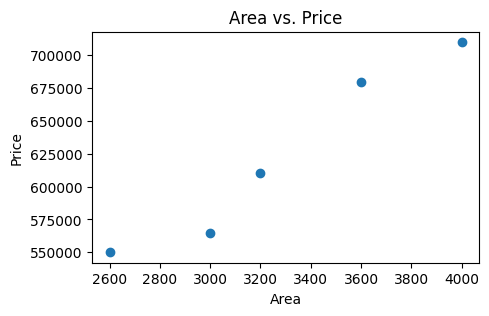

In [5]:
# visualising our data
plt.figure(figsize=(5,3))
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area vs. Price')
plt.scatter('area','price', data=data)
plt.show()

In [6]:
l_reg = linear_model.LinearRegression() # loading/assign linear regression model to variable

<div><hr><h3 style="color: cyan">l_reg.fit( input , target_variable)</h3>
    l_reg.fit ( data[[ 'area' ]], data[ 'price' ])<br>
    scikit-learn's fit() method expects X to be a 2-dimensional array (or DataFrame),<br>
    even if it has only one column.<hr>
</div>

In [7]:
# fitting / loading / training our model with data

l_reg.fit(data[['area']],data['price'])

LinearRegression()

In [8]:
l_reg.coef_ # in: y = mx + c , coef_ represent 'm'

array([126.54109589])

In [9]:
l_reg.intercept_ # in: y = mx + c , intercept_ represent 'c'

207945.20547945192

<h4 style="color: cyan">Now we will predict output</h4>

In [10]:
# we will predict for 5000 area units
l_reg.predict([[5000]])[0]

C:\Users\Akshay Kashyap\Envs\datascience\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


840650.6849315069

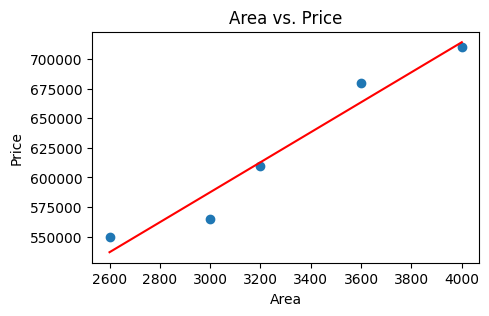

In [11]:
# visualising our data
plt.figure(figsize=(5,3))
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area vs. Price')
plt.scatter('area','price', data=data)

plt.plot(data['area'],l_reg.predict(data[['area']]), color = 'red') # plotting regression line

plt.show()

<hr><h3>Let's work with multiple variable input</h3><hr>

In [12]:
dt = pd.read_csv("ML_data/linear_multi.csv")

In [13]:
dt

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,25,565000
2,3200,NaN,18,620000
3,3600,3.0,30,595000
4,4200,5.0,8,760000


<p style="color:orange">Oooopsss we have missing value let's fix it</p><hr>fill it with mean

In [14]:
mn = dt['bedrooms'].mean()
mn

3.75

<p style="color:#55aa55">bedrooms(discrete) can't be decimal</p>

In [15]:
import math
mn = math.floor(mn)

In [16]:
# filling to all NaN in Bedroom column

# 1st method
    # 1st way
# dt['bedrooms'].fillna(mn, inplace= True) 
    # 2nd way
# dt['bedrooms'] = dt['bedrooms'].fillna(mn)
    # 3rd way
dt.fillna({'bedrooms': mn}, inplace=True)

# 2nd method
# dt.loc[2,'bedrooms']= mn # assigning to NaN 

In [17]:
dt

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,25,565000
2,3200,3.0,18,620000
3,3600,3.0,30,595000
4,4200,5.0,8,760000


In [18]:
reg = linear_model.LinearRegression()

In [19]:
reg.fit(dt[['area','bedrooms','age']], dt['price'])

LinearRegression()

In [20]:
reg.coef_

array([   93.75877398,  -478.47449696, -4975.43284979])

In [21]:
reg.intercept_

408947.12213383254

In [22]:
reg.predict([[7000,6,24]]) #area,bedroom,age

C:\Users\Akshay Kashyap\Envs\datascience\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([942977.30463266])

<hr><div class="alert alert-block alert-danger" style="margin-top: 20px"><h3>Calculating 'm' <code>(slope/ coefficient)</code> and 'b' <code>(intercept)</code></h3></div>

<hr>

`f(x) = wx + b`  ; (representing same as, y = mx + b) <br>

* `f(x)` is output of (wx + b) 
* `w` is weight
* `b` is bias

<hr>

here we will intentionally find we will give data from known line( y = 3x+2 )<br>
so we can match our estimated line and actual line<br>
y = 3x + 2;<br>
* x = 2, 5, 6, 8, 9
* y = 8, 17, 20, 26, 29

In [23]:
x = np.array([2, 5, 6, 8, 9])
y = np.array([8, 17, 20, 26, 29])
# y = np.array([ (3*i + 2) for i in x ])

In [24]:
y

array([ 8, 17, 20, 26, 29])

In [25]:
def gradient_descent(x,y):
    m = len(x) # no of points/data 
    w = b = 0 # assigning both 
    iteration = 1000
    alpha = 0.03 # learning_rate
    # for w
    for i in range(iteration):
        y_predicted = w*x + b # predicted y

        cost = (1/(2*m)) * sum(val**2 for val in (y_predicted-y)) # cost function

        
        W_derivative = (1/m)* sum((y_predicted-y)*x)
        b_derivative = (1/m)* sum(y_predicted-y)

        # gradient descent algo
        w = w - alpha * W_derivative
        b = b - alpha * b_derivative

        # to see values
        print(f" i: {i} slope: {w}, intercept: {b}, cost: {cost}") 

In [26]:
gradient_descent(x,y)

 i: 0 slope: 4.14, intercept: 0.6, cost: 227.0
 i: 1 slope: 2.9555999999999996, intercept: 0.43679999999999997, cost: 18.695599999999995
 i: 2 slope: 3.29292, intercept: 0.491688, cost: 1.6796321600000033
 i: 3 slope: 3.19533696, intercept: 0.48421176, cost: 0.2884586928319998
 i: 4 slope: 3.2220542736, intercept: 0.4945247544, cost: 0.17355728021191974
 i: 5 slope: 3.2132514330719997, intercept: 0.49971924252, cost: 0.1629146939547496
 i: 6 slope: 3.21460516374768, intercept: 0.50634240729144, cost: 0.16079869422714257
 i: 7 slope: 3.2130610241131436, intercept: 0.5125232055981144, cost: 0.15938961098138862
 i: 8 slope: 3.212349956722922, intercept: 0.5187965250898051, cost: 0.1580486319022174
 i: 9 slope: 3.2114056367358756, intercept: 0.525009637126985, cost: 0.15672349079765238
 i: 10 slope: 3.210532799765815, intercept: 0.5312063334007179, cost: 0.15540983234715555
 i: 11 slope: 3.209644332048759, intercept: 0.5373742394408496, cost: 0.15410721539830602
 i: 12 slope: 3.20876511056

<hr><h3>let's see visualize it with plot </h3><hr> say no, to worry just plot is added in the gradient_descent method

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent_plot(x, y):
    m = len(x)  # number of data points
    w = b = 0  # initial slope and intercept
    iteration = 1000
    alpha = 0.03  # learning rate

    # Plotting the initial dataset
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', label='Data points')

    # Gradient descent iterations
    for i in range(iteration):
        y_predicted = w * x + b  # predicted y

        cost = (1/(2*m)) * np.sum((y_predicted - y)**2)  # cost function

        W_derivative = (1/m) * np.sum((y_predicted - y) * x)
        b_derivative = (1/m) * np.sum(y_predicted - y)

        # Update w and b
        w = w - alpha * W_derivative
        b = b - alpha * b_derivative

        # Plot the current regression line
        if i % 100 == 0:  # plot every 100 iterations
            plt.plot(x, y_predicted, color='red', alpha=0.3, label=f'Iteration {i}')

    # Final regression line after all iterations
    plt.plot(x, y_predicted, color='green', label='Final regression line')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Gradient Descent Regression')
    plt.legend()
    plt.grid(True)
    plt.show()

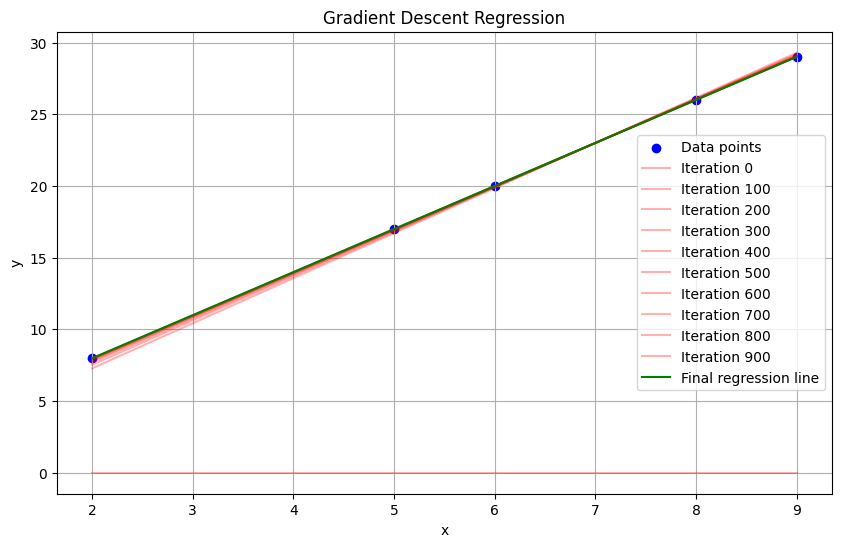

In [28]:
x = np.array([2, 5, 6, 8, 9])
y = np.array([8, 17, 20, 26, 29])
# y = np.array([ (3*i + 2) for i in x ])

gradient_descent_plot(x, y)

<hr><div class="alert alert-block alert-info" style="margin-top: 20px">
    <h3><code>Save</code> and <code>Load</code> trained model</h3</div>

two options
* pickle
* sklearn joblib (recommended)

<hr><p>Lets use <code>`pickle`</code></p><hr>

In [29]:
# module import
import pickle

# Saving model in file named(reg.pkl)
with open ("ML_data/reg.pkl",'wb') as f: # wb is write binary
    pickle.dump(reg,f)

In [30]:
#loading model from saved file

with open ("ML_data/reg.pkl",'rb') as f: # rb is read binary
    saved_reg = pickle.load(f)

In [31]:
# predicting through saved model
saved_reg.predict([[6000,5,30]]) #area,bedroom,age

C:\Users\Akshay Kashyap\Envs\datascience\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([819844.40804867])

<hr><p>Lets use <code>`sklearn joblib`</code></p><hr>

In [32]:
# importing 
import joblib

In [33]:
# saving model in file through joblib
joblib.dump(reg,"ML_data/reg_joblib.pkl")

['ML_data/reg_joblib.pkl']

In [34]:
# loading saved model through joblib
saved_reg_jb = joblib.load("ML_data/reg_joblib.pkl")

In [35]:
# predicting through saved model
saved_reg_jb.predict([[6000,5,30]]) #area,bedroom,age

C:\Users\Akshay Kashyap\Envs\datascience\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([819844.40804867])